In [ ]:
#hide
from utils import *

# Your deep learning journey

## Deep learning is for everyone

## Neural networks: a brief history

## What you will learn

## Who we are

## How to learn deep learning

## Your projects and your mindset

## The software: PyTorch, fastai, and Jupyter (and why it doesn't matter)

## Your first model

### Getting a GPU deep learning server

### Running your first notebook

In [ ]:
# CLICK ME
from fastai2.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.173175,0.019650,0.007442,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.050146,0.021953,0.005413,00:19


### Sidebar: This book was written in Jupyter Notebooks

In [ ]:
1+1

2

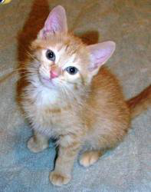

In [ ]:
img = PILImage.create('images/chapter1_cat_example.jpg')
img.to_thumb(192)

### End sidebar

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}; Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True; Probability it's a cat: 1.000000


### What is machine learning?

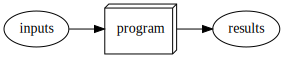

In [ ]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

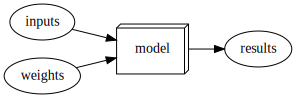

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

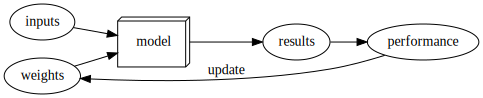

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

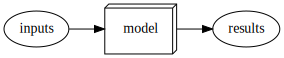

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What is a neural network?

### A bit of deep learning jargon

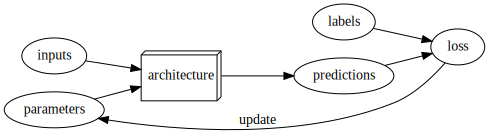

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### What our image recognizer did

### What our image recognizer learned

### What image recognizers can do

### A bit more jargon

## Deep learning is not just for image classification

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.094684,17.969349,00:02


epoch,train_loss,valid_loss,time
0,2.240286,2.426627,00:02
1,2.102374,2.367601,00:02
2,1.996238,2.024536,00:02
3,1.905420,1.848707,00:02
4,1.823647,1.731563,00:02
5,1.746672,1.647273,00:02
6,1.683376,1.627241,00:02
7,1.634751,1.611713,00:02


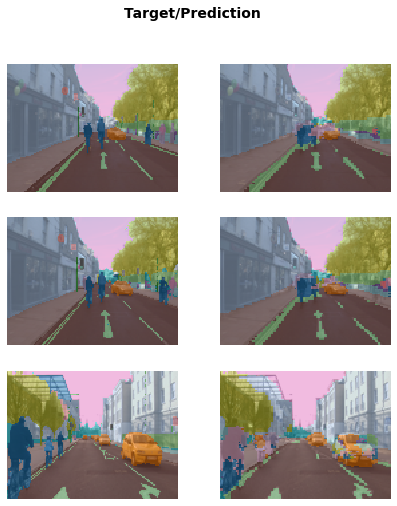

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.615716,0.398760,0.820280,01:27


epoch,train_loss,valid_loss,accuracy,time
0,0.291901,0.268219,0.897520,02:17
1,0.201469,0.207763,0.922560,02:20
2,0.146981,0.222368,0.918560,02:20
3,0.111359,0.197359,0.928360,02:11


In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0041, 0.9959]))

In [ ]:
from IPython.display import display, HTML, Markdown
md = show_doc(learn.predict, disp=False)
md += f'\n\n<a href="https://dev.fast.ai/learner#Learner.predict" target="_blank" rel="noreferrer noopener">Show in docs</a>'
display(Markdown(md))

<h4 id="Learner.predict" class="doc_header"><code>Learner.predict</code><a href="https://github.com/fastai/fastai2/tree/master/fastai2/learner.py#L330" class="source_link" style="float:right">[source]</a></h4>

> <code>Learner.predict</code>(**`item`**, **`rm_type_tfms`**=*`None`*)

Return the prediction on `item`, fully decoded, loss function decoded and probabilities

<a href="https://dev.fast.ai/learner#Learner.predict" target="_blank" rel="noreferrer noopener">Show in docs</a>

In [ ]:
from fastai2.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.359960,0.357917,0.831388,00:11
1,0.353458,0.349657,0.837991,00:10
2,0.338368,0.346997,0.843213,00:10


In [ ]:
from fastai2.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.554056,1.428071,00:01


epoch,train_loss,valid_loss,time
0,1.393103,1.361342,00:01
1,1.297930,1.159169,00:00
2,1.052705,0.827934,00:01
3,0.810124,0.668735,00:01
4,0.711552,0.627836,00:01
5,0.657402,0.611715,00:01
6,0.633079,0.605733,00:01
7,0.622399,0.602674,00:01
8,0.629075,0.601671,00:00
9,0.619955,0.601550,00:01


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,157,1200,4.0,3.558502
1,23,344,2.0,2.700709
2,19,1221,5.0,4.390801
3,430,592,3.5,3.944848
4,547,858,4.0,4.076881
5,292,39,4.5,3.753513
6,529,1265,4.0,3.349463
7,19,231,3.0,2.881087
8,475,4963,4.0,4.023387
9,130,260,4.5,3.979703


### Sidebar: Datasets: food for models

### End sidebar

## Validation sets and test sets

### Use judgment in defining test sets

## A _Choose Your Own Adventure_ moment

## End of chapter questionnaire

### Further research